Load in Amazon reviews

In [1]:
import pandas as pd
import gzip

import matplotlib.pyplot as plt

import numpy as np

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
df_old = pd.read_csv('amazon_reviews_clothes_and_cells.csv', index_col = 0, low_memory = False)

In [24]:
df = getDF('reviews_Pet_Supplies_5.json.gz')

In [25]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3.0,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011"
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5.0,Entertaining for my cats,1379116800,"09 14, 2013"
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4.0,Entertaining,1355875200,"12 19, 2012"
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4.0,Happy to have them,1305158400,"05 12, 2011"
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3.0,You really only need vol 2,1330905600,"03 5, 2012"


In [26]:
tags = df['helpful'].apply(pd.Series).rename(columns={0:'helping',1:'votes'})

In [27]:
df = pd.concat([df[:], tags[:]], axis=1)

In [28]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helping,votes
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3.0,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011",0,0
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5.0,Entertaining for my cats,1379116800,"09 14, 2013",0,0
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4.0,Entertaining,1355875200,"12 19, 2012",0,0
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4.0,Happy to have them,1305158400,"05 12, 2011",2,2
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3.0,You really only need vol 2,1330905600,"03 5, 2012",6,7


In [29]:
df_voted_pets = df.loc[df['votes']>5]

In [30]:
df_voted_pets.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helping,votes
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3.0,You really only need vol 2,1330905600,"03 5, 2012",6,7
5,A2V3UP9NPMHVKJ,4847676011,"Alex Thomas ""Tommy""","[10, 10]","My Rottie has food allergies to poultry, beef ...",5.0,Great for Pups with Food Allergies,1184284800,"07 13, 2007",10,10
10,A1OXLCCN5XF21I,9376674824,"adoih ""awoeih""","[5, 7]",my dog like his kibbles more than treats (he L...,2.0,my puppy wont eat his food,1302307200,"04 9, 2011",5,7
13,A205LGULOCTVF2,9376674824,"Beth ""Yoga will restore you""","[6, 8]",I bought this product to stop the problem we w...,4.0,Mixed Results,1220745600,"09 7, 2008",6,8
16,A4YZH857YFUV0,9376674824,"Luna Zee ""Luna""","[11, 13]",We added a two-year old corgi to our family in...,3.0,"Has decreased the frequency, but not eliminate...",1298937600,"03 1, 2011",11,13


In [31]:
df_voted_pets.shape

(7975, 11)

In [32]:
df_new = pd.concat([df_new[:], df_voted_pets[:]], axis=0)
df_new.shape

(94295, 11)

In [33]:
df_new.to_csv('amazon_reviews_clothes_cells_home_office_pets.csv')

Pre-process the reviews

In [2]:
df_voted_all = pd.read_csv('amazon_reviews_clothes_cells_home_office_pets.csv',index_col=0, low_memory=False)

In [3]:
df_voted_all['helpful_frac'] = df_voted_all['helping']/df_voted_all['votes']

In [4]:
df_voted_all.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helping,votes,helpful_frac
9,A3EERSWHAI6SO,0000031887,"Jeffrey Hollingshead ""Jillian hollingshead""","[7, 8]",For what I paid for two tutus is unbeatable an...,5.0,WOW !! ..is all I have to say!,1349568000,"10 7, 2012",7,8,0.875000
30,A3INPLAFCMRI3I,1608299953,Cheryl,"[201, 205]","The product itself is five stars, however the ...",4.0,4 stars BUT beware...,1322956800,"12 4, 2011",201,205,0.980488
31,A3NHUQ33CFH3VM,1608299953,Citizen John,"[5, 6]",The first question was which computers to inst...,4.0,Intense way to learn,1285027200,"09 21, 2010",5,6,0.833333
32,A253TILLU81VZK,1608299953,D. Connelly,"[11, 13]","Okay, I admit it. I'm one of the millions of A...",5.0,Helped me actually get an A in a foreign langu...,1308182400,"06 16, 2011",11,13,0.846154
33,A28QH3KX709FFQ,1608299953,"Don Quixote ""Don Q""","[24, 31]",I bought this product a little over a year ago...,1.0,DO NOT BUY IF YOU EVER WANT TO RESELL IT.,1348185600,"09 21, 2012",24,31,0.774194


(array([  910.,   290.,   659.,   534.,   369.,   794.,   760.,   416.,
          813.,   261.,  1690.,  1551.,  1254.,  3875.,  3143.,  4616.,
         9423., 11820., 14114., 37003.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

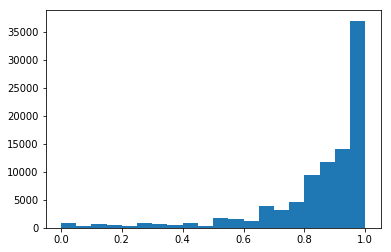

In [5]:
%matplotlib inline

plt.hist(df_voted_all['helpful_frac'],bins=20)

In [64]:
df_unhelp = df_voted_all.loc[df_voted_all['helpful_frac']<.6]

In [65]:
df_help = df_voted_all.loc[df_voted_all['helpful_frac']>.85]

In [66]:
df_unhelp.shape

(8740, 12)

In [67]:
df_help_downsample = df_help.sample(n=df_unhelp.shape[0])

In [68]:
df_help_downsample.shape

(8740, 12)

In [69]:
df_help_downsample['label']=True

In [70]:
df_unhelp['label']=False

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
df_unhelp.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helping,votes,helpful_frac,label
147,AOC6CQ1MHA8UD,B000051SEP,P. Taegel,"[3, 6]","This watch screams high-tech, and anyone ventu...",5.0,Excellent Watch,1121472000,"07 16, 2005",3,6,0.500000,False
323,A2182PKLBKXADO,B00006XXGO,xmx,"[1, 6]",My son only wore these shoes once (he's only 2...,2.0,Wait until they're older,1335139200,"04 23, 2012",1,6,0.166667,False
338,A1PPDBGCKM9AM0,B0000722HK,"Skipper McFearson ""quickcuda6""","[6, 15]",Great fabric and tight fit. Problem is that i...,1.0,Designed for dwarfs,1298592000,"02 25, 2011",6,15,0.400000,False
374,A2CDDKORD3XRBJ,B000072UMJ,el viejo,"[0, 10]",I did not know that Converse stooped that low ...,1.0,VIETNAM GARBAGE,1360281600,"02 8, 2013",0,10,0.000000,False
729,AYOMAHLWRQHUG,B0000868O9,Conspicuous Consumer,"[4, 7]",I was looking for a casual bra to wear when I ...,1.0,Neither Comfortable Nor Attractive,1277942400,"07 1, 2010",4,7,0.571429,False


In [72]:
df_resampled = pd.concat([df_unhelp[:], df_help_downsample[:]], axis=0)

In [73]:
df_resampled.shape

(17480, 13)

In [74]:
df_resampled['reviewText']= df_resampled.reviewText.apply(str)

In [75]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

In [76]:
standardized_df = standardize_text(df_resampled, 'reviewText')

In [77]:
#Tokenize the text - old method
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

standardized_df["tokens"] = standardized_df['reviewText'].apply(tokenizer.tokenize)
standardized_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helping,votes,helpful_frac,label,tokens
147,AOC6CQ1MHA8UD,B000051SEP,P. Taegel,"[3, 6]","this watch screams high tech, and anyone ventu...",5.0,Excellent Watch,1121472000,"07 16, 2005",3,6,0.500000,False,"[this, watch, screams, high, tech, and, anyone..."
323,A2182PKLBKXADO,B00006XXGO,xmx,"[1, 6]",my son only wore these shoes once (he's only 2...,2.0,Wait until they're older,1335139200,"04 23, 2012",1,6,0.166667,False,"[my, son, only, wore, these, shoes, once, he, ..."
338,A1PPDBGCKM9AM0,B0000722HK,"Skipper McFearson ""quickcuda6""","[6, 15]",great fabric and tight fit problem is that i...,1.0,Designed for dwarfs,1298592000,"02 25, 2011",6,15,0.400000,False,"[great, fabric, and, tight, fit, problem, is, ..."
374,A2CDDKORD3XRBJ,B000072UMJ,el viejo,"[0, 10]",i did not know that converse stooped that low ...,1.0,VIETNAM GARBAGE,1360281600,"02 8, 2013",0,10,0.000000,False,"[i, did, not, know, that, converse, stooped, t..."
729,AYOMAHLWRQHUG,B0000868O9,Conspicuous Consumer,"[4, 7]",i was looking for a casual bra to wear when i ...,1.0,Neither Comfortable Nor Attractive,1277942400,"07 1, 2010",4,7,0.571429,False,"[i, was, looking, for, a, casual, bra, to, wea..."


In [64]:
standardized_df['reviewText'].dtype

dtype('O')

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebeccareitz/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
import random
import codecs
from collections import defaultdict
from gensim.models.ldamodel import LdaModel as Lda
from gensim import corpora
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk import pos_tag
import enchant
spelling_dict = enchant.Dict("en_US")
stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()
stemmed_dict = defaultdict(set)
def stem_and_update_stem_dict(tokens):
    output_list = []
    for token in tokens:
        stemmed = stemmer.stem(token)
        if stemmed != token:
            stemmed_dict[stemmed].add(token)
        output_list.append(stemmed)
    return output_list

list_of_POS_to_ignore = ['WRB', 'WP$', 'WP',  'WDT', 'UH', 
                         'TO', 'RP', 'RBS', 'RBR', 'PRP$', 'PRP', 
                        'MD', 'JJS', 'JJR', 'JJ', 'IN', 'FW', 'EX', 
                         'DT', 'CD']

In [58]:
def clean(tokens): 
    tokens = [i for i in tokens if i not in stop]
    # removing pos data 
    tokens = [word for word, pos in pos_tag(tokens) if pos not in list_of_POS_to_ignore]
    # Removing improperly spelled words (pronouns must be capitalized to be spelled right)
    tokens = [word for word in tokens if spelling_dict.check(word)]
    # lowercase
    tokens = [word.lower() for word in tokens]
    # lemmatized
    tokens = [lemma.lemmatize(word, 'v') for word in tokens]
    # removing short words 
    tokens = [s for s in tokens if len(s) > 2]
    # stemmed
    tokens = stem_and_update_stem_dict(tokens)
    return tokens

In [70]:
standardized_df["tokens"] = clean(standardized_df['tokens'])

TypeError: expected string or bytes-like object

In [78]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in standardized_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in standardized_df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

3112015 words total, with a vocabulary size of 45698
Max sentence length is 3536


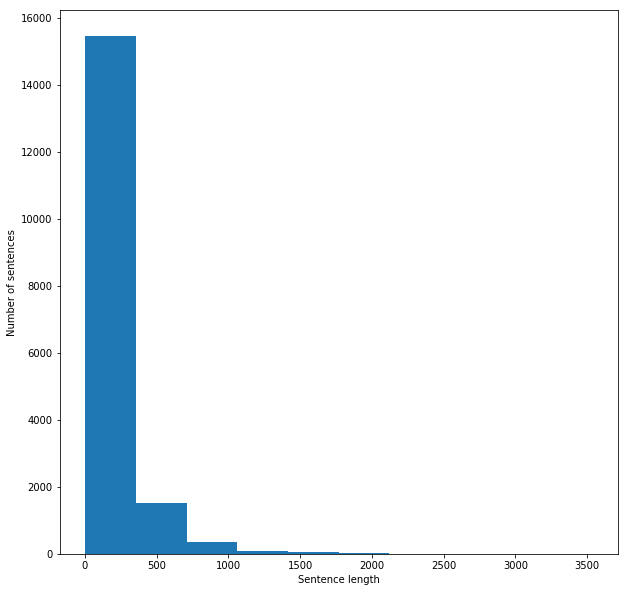

In [79]:
#most reviews are short
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

Start training models on the reviews

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = standardized_df["reviewText"].tolist()
list_labels = standardized_df["label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

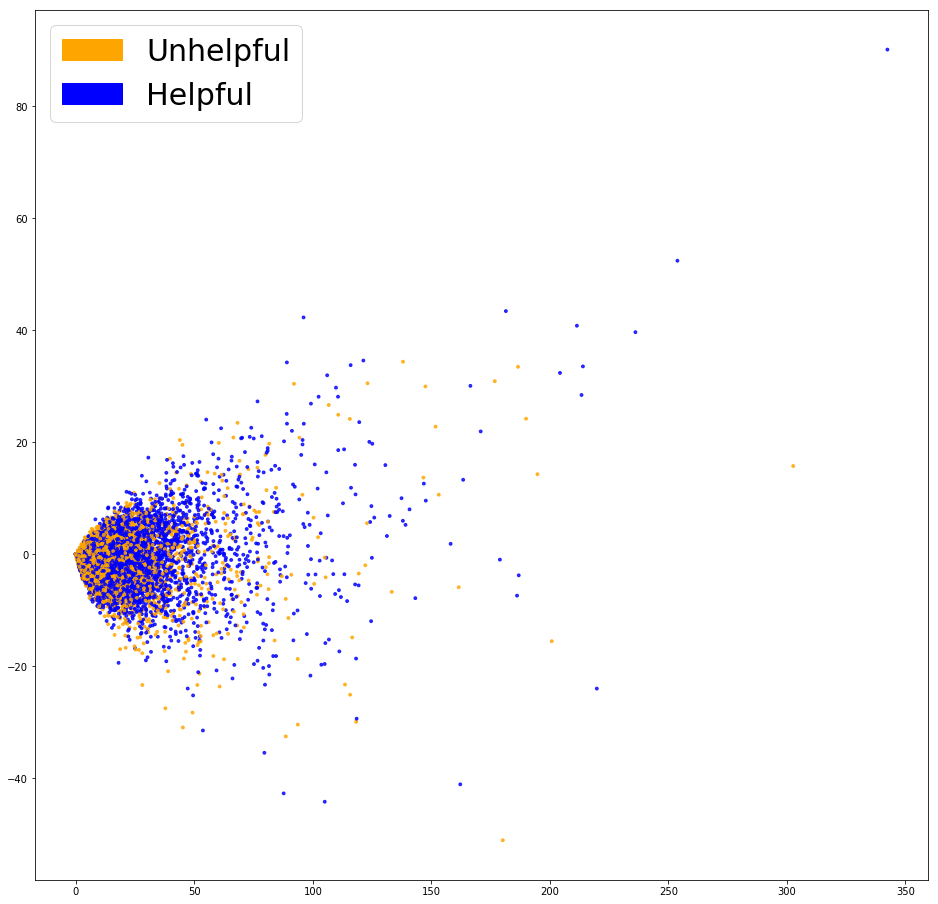

In [81]:
from  sklearn.decomposition  import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Unhelpful')
            green_patch = mpatches.Patch(color='blue', label='Helpful')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})

%matplotlib inline
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [82]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.711, precision = 0.711, recall = 0.711, f1 = 0.711


In [26]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

In [27]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Disaster', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

KeyError: 1

In [84]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

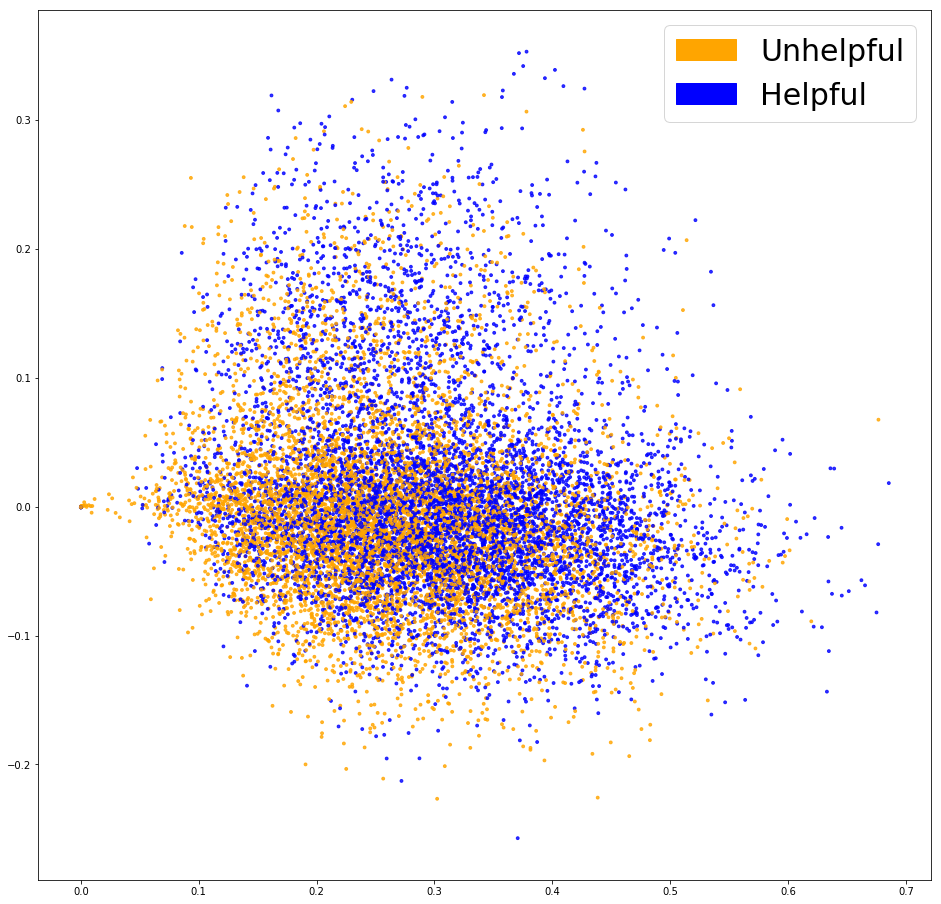

In [85]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [86]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [87]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.736, precision = 0.736, recall = 0.736, f1 = 0.736


In [93]:
clf_rand_forest_tfidf = RandomForestClassifier(n_estimators = 40)
clf_rand_forest_tfidf.fit(X_train_tfidf, y_train)
y_predicted_forest_tfidf = clf_rand_forest_tfidf.predict(X_test_tfidf)

In [94]:
accuracy_forest_tfidf, precision_forest_tfidf, recall_forest_tfidf, f1_forest_tfidf = get_metrics(y_test, y_predicted_forest_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_forest_tfidf, precision_forest_tfidf, 
                                                                       recall_forest_tfidf, f1_forest_word2vec))

accuracy = 0.703, precision = 0.704, recall = 0.703, f1 = 0.631


In [32]:
import gensim

word2vec_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [33]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [88]:
embeddings = get_word2vec_embeddings(word2vec, standardized_df)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

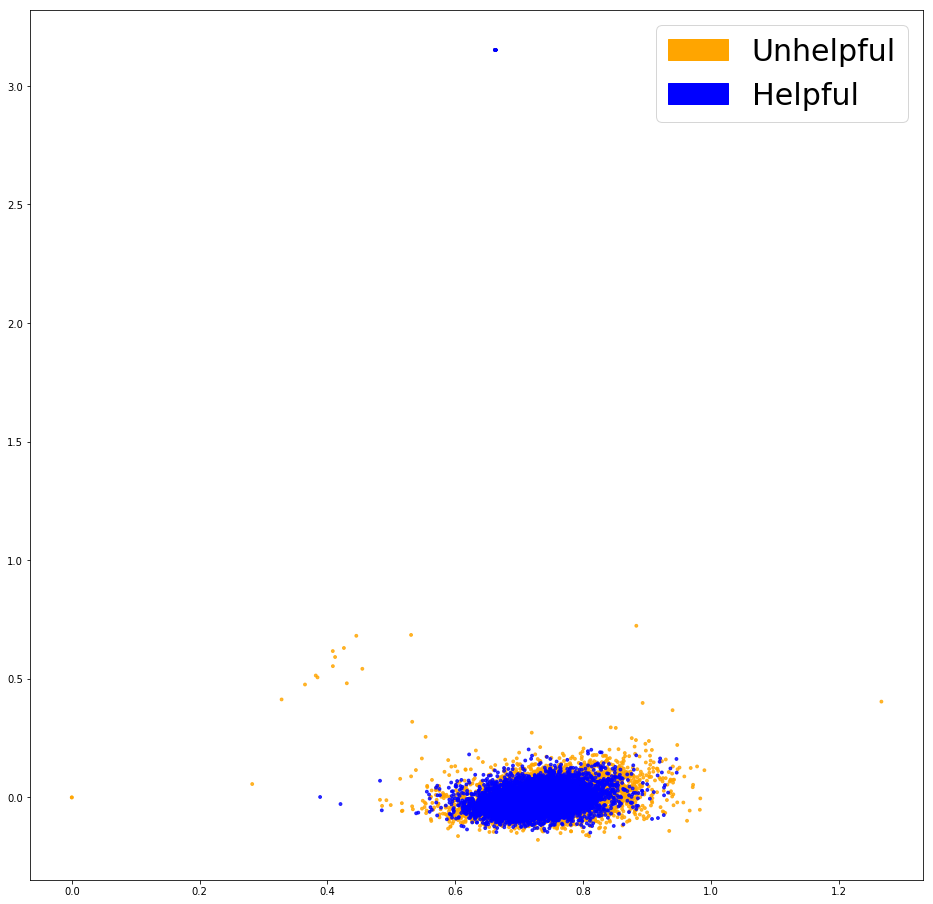

In [89]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [90]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [91]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.712, precision = 0.712, recall = 0.712, f1 = 0.712


In [38]:
from sklearn.ensemble import RandomForestClassifier

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
clf_rand_forest_w2v = RandomForestClassifier(n_estimators = 40)
clf_rand_forest_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_forest_word2vec = clf_rand_forest_w2v.predict(X_test_word2vec)

In [40]:
accuracy_forest_word2vec, precision_forest_word2vec, recall_forest_word2vec, f1_forest_word2vec = get_metrics(y_test_word2vec, y_predicted_forest_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.657, precision = 0.657, recall = 0.657, f1 = 0.657


The most sucessful technique with a logistic regression with tfidf. Let's pickle the vectorizer and model in case they are needed in the future (aka in case I can get the website to process live data)

In [141]:
import pickle

pickle.dump(tfidf_vectorizer, open("tfidf_vectorizer.pickle", "wb"))
pickle.dump(clf_tfidf, open('clf_tfidf.pickle', 'wb'))

## Apply Helpfulness to Ali Express Reviews
Load in English AliExpress Reviews - apply prior tfidf encoder - get helpfulness scores

In [95]:
ali_english_df = pd.read_csv('english_reviews_only.csv',index_col=0,low_memory=False)

In [96]:
ali_english_df.head()

,product_id,anonymous,buyercountry,buyereval,buyerfeedback,buyergender,buyerheadportrait,buyerid,buyername,evaldate,...,max_freq,initial_trust,trust_tag,feedback_na,image_na,feedbacklength,basic_trust,basic_trust_tag,reviewer_review_count,feedback_lang
0,32243608596,False,US,100,"Great fabric and quality, fast delivery and co...",NaN,https://ae01.alicdn.com/kf/UTB8vTH0hFPJXKJkSah...,230419691,E***e L.,2018-08-31,...,1.0,0.5,No standout reviewer features,False,False,81,0.5,Review has no standout features,2.0,en
4,32243608596,False,US,100,thanks!,F,https://ae01.alicdn.com/kf/UTB8eeCYxqrFXKJk43O...,890393619,E****************r N.,2018-08-18,...,1.0,0.5,No standout reviewer features,False,False,7,0.5,Review has no standout features,1.0,en
5,32243608596,False,US,60,not bad for such price,NaN,NaN,1693179945,Y*******d Y.,2018-08-28,...,1.0,0.5,No standout reviewer features,False,False,22,0.5,Review has no standout features,1.0,en
7,32243608596,False,US,100,"nice cap, my boyfriend is very happy with it. ...",NaN,NaN,1673192723,S*****a W.,2018-08-23,...,1.0,1.0,Posts a good number of reviews at a reasonable...,False,True,146,1.0,Trusted Reviewer,1.0,en
11,32243608596,False,US,20,All stained. Terrible goods,M,https://gw.alicdn.com/tps/TB1CjX4LXXXXXbSXFXXX...,725446934,S***g C.,2018-08-29,...,1.0,1.0,Posts a good number of reviews at a reasonable...,False,False,27,1.0,Trusted Reviewer,1.0,en


In [97]:
ali_english_df_stand = standardize_text(ali_english_df,'buyerfeedback')

In [99]:
ali_only_words = ali_english_df_stand['buyerfeedback']

In [100]:
ali_tfidf = tfidf_vectorizer.transform(ali_only_words)

In [104]:
ali_tfidf.shape

(25006, 40988)

In [101]:
ali_y_tfidf = clf_tfidf.predict_proba(ali_tfidf)

In [106]:
ali_y_tfidf

array([[0.0951461 , 0.9048539 ],
       [0.59280516, 0.40719484],
       [0.99380669, 0.00619331],
       ...,
       [0.55913227, 0.44086773],
       [0.79909624, 0.20090376],
       [0.38480163, 0.61519837]])

In [107]:
ali_y_tfidf_total = clf_tfidf.predict(ali_tfidf)

In [109]:
ali_y_tfidf_total

array([ True, False, False, ..., False, False,  True])

In [116]:
ali_y_df = pd.DataFrame(ali_y_tfidf, columns = ['unhelp_prob','help_prob'], index = ali_english_df.index.values)

In [117]:
ali_y_df.head()

,unhelp_prob,help_prob
0,0.095146,0.904854
4,0.592805,0.407195
5,0.993807,0.006193
7,0.753699,0.246301
11,0.718937,0.281063


In [118]:
ali_with_amazon_prob = pd.concat([ali_english_df[:],ali_y_df[:]],axis = 1)

In [119]:
ali_with_amazon_prob.head()

,product_id,anonymous,buyercountry,buyereval,buyerfeedback,buyergender,buyerheadportrait,buyerid,buyername,evaldate,...,trust_tag,feedback_na,image_na,feedbacklength,basic_trust,basic_trust_tag,reviewer_review_count,feedback_lang,unhelp_prob,help_prob
0,32243608596,False,US,100,"great fabric and quality, fast delivery and co...",NaN,https://ae01.alicdn.com/kf/UTB8vTH0hFPJXKJkSah...,230419691,E***e L.,2018-08-31,...,No standout reviewer features,False,False,81,0.5,Review has no standout features,2.0,en,0.095146,0.904854
4,32243608596,False,US,100,thanks!,F,https://ae01.alicdn.com/kf/UTB8eeCYxqrFXKJk43O...,890393619,E****************r N.,2018-08-18,...,No standout reviewer features,False,False,7,0.5,Review has no standout features,1.0,en,0.592805,0.407195
5,32243608596,False,US,60,not bad for such price,NaN,NaN,1693179945,Y*******d Y.,2018-08-28,...,No standout reviewer features,False,False,22,0.5,Review has no standout features,1.0,en,0.993807,0.006193
7,32243608596,False,US,100,"nice cap, my boyfriend is very happy with it ...",NaN,NaN,1673192723,S*****a W.,2018-08-23,...,Posts a good number of reviews at a reasonable...,False,True,146,1.0,Trusted Reviewer,1.0,en,0.753699,0.246301
11,32243608596,False,US,20,all stained terrible goods,M,https://gw.alicdn.com/tps/TB1CjX4LXXXXXbSXFXXX...,725446934,S***g C.,2018-08-29,...,Posts a good number of reviews at a reasonable...,False,False,27,1.0,Trusted Reviewer,1.0,en,0.718937,0.281063


In [120]:
ali_with_amazon_prob.to_csv('Ali_Express_English_Reviews_with_Amazon_Helpfulness.csv')

In [121]:
ali_with_amazon_prob.shape

(25006, 26)

In [122]:
ali_helpful = ali_with_amazon_prob.loc[ali_with_amazon_prob['help_prob']>.6]

In [123]:
ali_helpful.shape

(10595, 26)

In [127]:
ali_helpful.groupby('buyereval').agg({'buyerid':'count'})/ali_helpful.shape[0]

,buyerid
buyereval,
100,0.786881
20,0.004247
40,0.003681
60,0.016612
80,0.044455


In [128]:
ali_with_amazon_prob.groupby('buyereval').agg({'anonymous':'count'})/ali_with_amazon_prob.shape[0]

,buyerid
buyereval,
100,0.702951
20,0.026594
40,0.010318
60,0.044469
80,0.069423
buyerEval,0.000040


In [132]:
ali_helpful.groupby('basic_trust').agg({'anonymous':'count'})/ali_helpful.shape[0]

,anonymous
basic_trust,
0.5,0.778858
1.0,0.132893


In [133]:
ali_with_amazon_prob.groupby('basic_trust').agg({'anonymous':'count'})/ali_with_amazon_prob.shape[0]

,anonymous
basic_trust,
0.5,0.788131
1.0,0.129209


In [134]:
ali_helpful['buyerfeedback']

0         great fabric and quality, fast delivery and co...
13        well made  seems to be a one size fits all of ...
15        nice cap in good quality  oryginally was too b...
16        love the hat, nice design, affordable price, g...
30        amazing product, perfect fit  fast shipping  w...
40        order came to india within a month, would defi...
44        the hat is beautiful  quality material  a soli...
56        ver y good packed, little r ps con the top of ...
60                         nice product thank you very much
62        it took 20 days to deliver here, nice quality ...
72        great fabric and quality, fast delivery and co...
81        received in good time  good communication from...
114       thank you very much seller you're the best goo...
142       fast delivery  good quality  beautiful colors ...
209       lovely slacks  i don't want to open them right...
213                          good quality thank you somuch 
215                           very cute!

In [136]:
critical_helpful = ali_helpful.loc[pd.to_numeric(ali_helpful['buyereval'])<80]

In [137]:
critical_helpful['buyerfeedback']

907       not good quality for the charged price  came q...
4226      i ordered the airpod, but i received them one ...
4445      took about three weeks  decent quality and bui...
7440      sound quality is average  not much solid and d...
7663      it's the same model as the t4, just a differen...
7720      good sound quality  \ncame with original box a...
7725      i've never received from ali so well packaged ...
8671      about the third time i buy a baseus product an...
9345      it's not easy to listen to music while moving ...
9443      indeed an original xiaomi, but sounds quality ...
9595      product nice but right side heavy weight due t...
9967      when walking the headphones glitch and the rec...
10550                     way bigger than the original ones
11172     i'm not satisfied at all, earphones became bro...
11544       very fast shipping (10 days to czech republi...
11587     very, very, very , very  slowly   sorry im dis...
12154     good watch, the original black

In [140]:
critical_helpful.groupby('product_id').agg({'buyerid':'count'}).rename(columns={'buyerid':'count'}).sort_values(by='count', ascending=False)

,count
product_id,
32750221334,9
32694698464,6
32892818354,4
32818439807,4
32807248161,4
32844790941,4
32857159419,4
32848391121,4
32838710682,3


In [142]:
ali_with_amazon_prob.columns

Index(['product_id', 'anonymous', 'buyercountry', 'buyereval', 'buyerfeedback',
       'buyergender', 'buyerheadportrait', 'buyerid', 'buyername', 'evaldate',
       'image', 'logistics', 'skuinfo', 'thumbnail', 'max_freq',
       'initial_trust', 'trust_tag', 'feedback_na', 'image_na',
       'feedbacklength', 'basic_trust', 'basic_trust_tag',
       'reviewer_review_count', 'feedback_lang', 'unhelp_prob', 'help_prob'],
      dtype='object')

In [148]:
pd.to_numeric(ali_with_amazon_prob.buyereval, errors='coerce').min

<bound method Series.min of 0         100.0
4         100.0
5          60.0
7         100.0
11         20.0
13        100.0
15        100.0
16        100.0
18         20.0
21         80.0
24        100.0
30        100.0
35        100.0
40        100.0
44        100.0
56        100.0
60        100.0
62        100.0
72        100.0
73        100.0
81        100.0
95         40.0
103         NaN
114       100.0
118       100.0
127       100.0
137       100.0
142       100.0
164       100.0
165       100.0
          ...  
136111    100.0
136113     60.0
136114    100.0
136122     20.0
136129     20.0
136132    100.0
136136    100.0
136138    100.0
136142    100.0
136152    100.0
136160    100.0
136162    100.0
136174     60.0
136186     20.0
136225    100.0
136228    100.0
136230     20.0
136234    100.0
136235    100.0
136236    100.0
136238    100.0
136239    100.0
136242    100.0
136245    100.0
136246    100.0
136253    100.0
136271    100.0
136283    100.0
136301     60.0
136303    10

In [149]:
helpful_sorted = ali_with_amazon_prob.sort_values(by='help_prob',ascending=False)

In [150]:
helpful_sorted.head()

,product_id,anonymous,buyercountry,buyereval,buyerfeedback,buyergender,buyerheadportrait,buyerid,buyername,evaldate,...,trust_tag,feedback_na,image_na,feedbacklength,basic_trust,basic_trust_tag,reviewer_review_count,feedback_lang,unhelp_prob,help_prob
35649,32819598507,False,US,100,"really beautiful dress, exactly like in pictur...",NaN,NaN,1673702544.0,T***a G.,2018-04-03,...,NaN,False,True,131,0.5,Review has no standout features,1.0,en,0.001517,0.998483
124158,32817159473,False,RS,100,the order ariived quickly and i'm very satisfi...,NaN,NaN,732563223.0,M****a P.,2018-07-14,...,NaN,False,False,95,0.5,Review has no standout features,1.0,en,0.001557,0.998443
35670,32819598507,False,US,100,very beautiful i wear medium size but i had to...,NaN,NaN,1676117240.0,K*****a O.,2018-04-02,...,NaN,False,True,79,0.5,Review has no standout features,1.0,en,0.001609,0.998391
77847,32792018794,False,US,100,fits perfect and so beautiful!,F,https://ae01.alicdn.com/kf/UT8Vui5Xz4XXXagOFbX...,761338195.0,B*****a F.,2018-04-09,...,NaN,False,False,30,NaN,NaN,2.0,en,0.001880,0.998120
77719,32792018794,False,US,100,fits perfect and so beautiful!,F,https://ae01.alicdn.com/kf/UT8Vui5Xz4XXXagOFbX...,761338195.0,B*****a F.,2018-04-09,...,NaN,False,False,30,0.5,Review has no standout features,2.0,en,0.001880,0.998120


In [153]:
helpful_sorted.iloc[1]

product_id                                                     32817159473
anonymous                                                            False
buyercountry                                                            RS
buyereval                                                              100
buyerfeedback            the order ariived quickly and i'm very satisfi...
buyergender                                                            NaN
buyerheadportrait                                                      NaN
buyerid                                                        732563223.0
buyername                                                        M****a P.
evaldate                                                        2018-07-14
image                    https://ae01.alicdn.com/kf/UTB87oRzBpfFXKJk43O...
logistics                                        4PX Singapore Post OM Pro
skuinfo                                                  Metal Color:C458 
thumbnail                

In [155]:
helpful_sorted['buyereval']=pd.to_numeric(helpful_sorted['buyereval'], errors='coerce')

In [156]:
helpful_sorted.buyereval.min()

20.0

In [157]:
negative_reviews = helpful_sorted.loc[helpful_sorted['buyereval']<60]

In [158]:
negative_reviews.head()

,product_id,anonymous,buyercountry,buyereval,buyerfeedback,buyergender,buyerheadportrait,buyerid,buyername,evaldate,...,trust_tag,feedback_na,image_na,feedbacklength,basic_trust,basic_trust_tag,reviewer_review_count,feedback_lang,unhelp_prob,help_prob
122416,32750221334,False,SRB,20.0,the necklace arrived without the third pendant...,NaN,NaN,1673849935.0,S*b M.,2018-07-13,...,NaN,False,False,196,1.0,Review is long and include pictures. Looks lik...,1.0,en,0.016642,0.983358
74446,32892818354,False,US,40.0,the ring before it s worn is absolutely gorgeo...,NaN,NaN,791831100.0,M*****l I.,2018-08-26,...,NaN,False,True,291,0.5,Review has no standout features,1.0,en,0.021460,0.978540
30517,32835861093,False,US,40.0,its clearly not a medium size it fit me well ...,NaN,NaN,921735480.0,M****e N.,2018-04-16,...,NaN,False,True,146,0.5,Review has no standout features,1.0,en,0.026705,0.973295
98587,2038339856,False,US,20.0,one of my earrings were broken they are beaut...,NaN,NaN,889899294.0,M********z S.,2018-09-11,...,NaN,False,False,107,1.0,Review is long and include pictures. Looks lik...,1.0,en,0.050999,0.949001
122784,32750221334,False,IT,40.0,the necklace is really tooooa long,NaN,https://ae01.alicdn.com/kf/UTB89Memq0oSdeJk43O...,710394035.0,J***a J.,2018-06-04,...,NaN,False,False,35,0.5,Review has no standout features,3.0,en,0.061985,0.938015
